In [3]:
%matplotlib notebook
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Metoda prozorskih funkcija

<IPython.core.display.Javascript object>


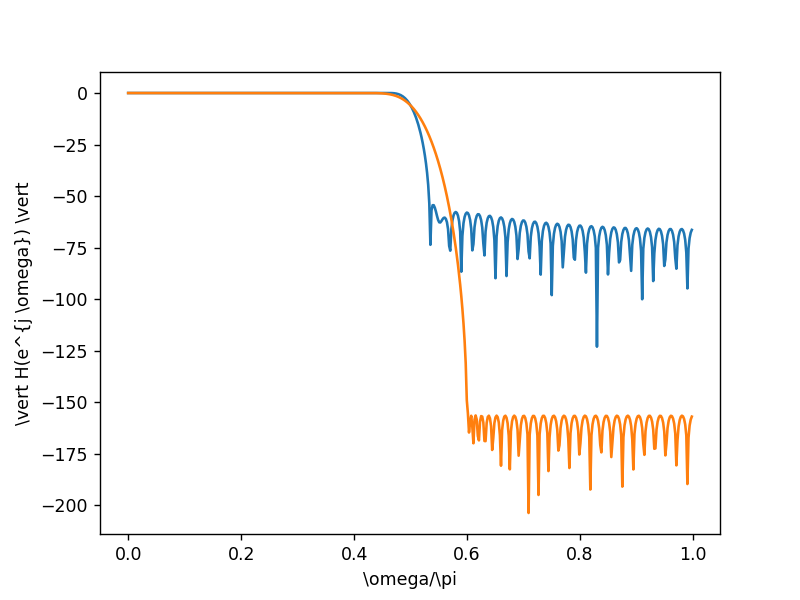

Text(0,0.5,'\\vert H(e^{j \\omega}) \\vert')

In [3]:
N = 50
n = np.arange(-N, N+1)
hh = signal.firwin(2*N+1, 0.5, window='hamming')

w, Hh = signal.freqz(hh, 1)

plt.figure()
line1, = plt.plot(w/np.pi, 20*np.log10(np.abs(Hh)))
plt.xlabel(r'\omega/\pi')
plt.ylabel(r'\vert H(e^{j \omega}) \vert')

Parks-Meklelan (Parks-McClellan) algoritam. Zadaju se granične frekvencije propusnog i nepropusnog opsega, željene vrijednosti amplitudne karakteristike i, opciono, težinske funkcije kojima se određuje koliko odstupanje od idealne karakteristike se može tolerisati.

In [4]:
hpm = signal.remez(2*N+1, [0, 0.4, 0.6, 1], [1, 0], fs=2)
w, Hpm = signal.freqz(hpm, 1)

line2, = plt.plot(w/np.pi, 20*np.log10(np.abs(Hpm)))

Batervortov filtar

In [16]:
wp = 0.4
ws = 0.6
Rp = 1
Rs = 40

n, wn = signal.buttord(wp, ws, Rp, Rs)
n

9

<IPython.core.display.Javascript object>


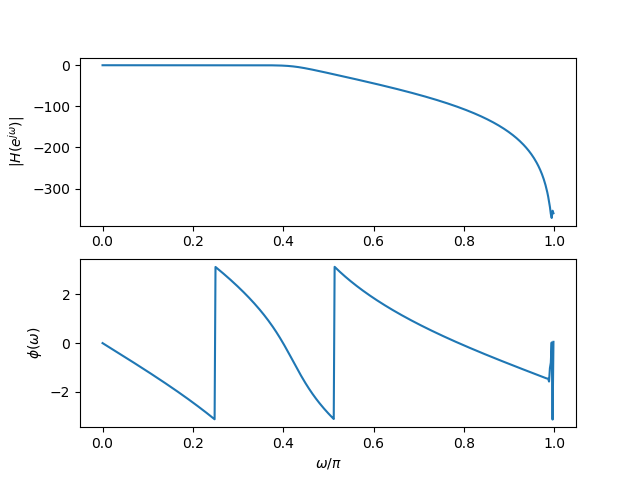

Text(0, 0.5, '$\\phi (\\omega)$')

In [17]:
bbut, abut = signal.butter(n, wn)
w, Hbut = signal.freqz(bbut, abut)

plt.figure()
plt.subplot(211)
plt.plot(w/np.pi, 20*np.log10(np.abs(Hbut)))
plt.ylabel(r'$\vert H(e^{j \omega}) \vert$')
plt.subplot(212)
plt.plot(w/np.pi, np.angle(Hbut))
plt.xlabel(r'$\omega/\pi$')
plt.ylabel(r'$\phi (\omega)$')

Čebiševljev filtar

In [14]:
n, wn = signal.cheb1ord(wp, ws, Rp, Rs)
n

5

<IPython.core.display.Javascript object>


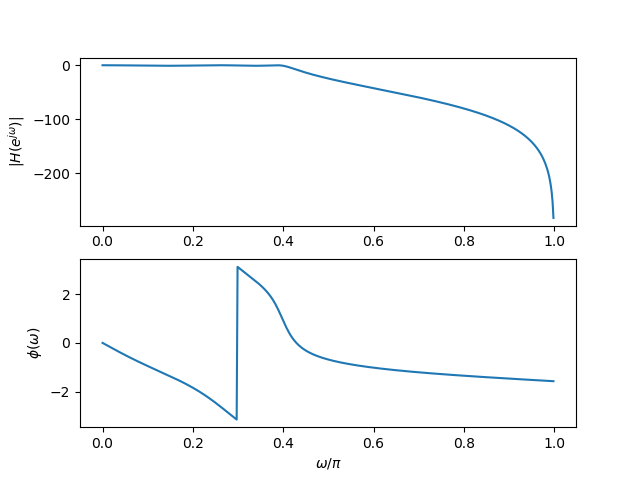

Text(0, 0.5, '$\\phi (\\omega)$')

In [15]:
bche, ache = signal.cheby1(n, Rp, wn)
w, Hche = signal.freqz(bche, ache)

plt.figure()
plt.subplot(211)
plt.plot(w/np.pi, 20*np.log10(np.abs(Hche)))
plt.ylabel(r'$\vert H(e^{j \omega}) \vert$')
plt.subplot(212)
plt.plot(w/np.pi, np.angle(Hche))
plt.xlabel(r'$\omega/\pi$')
plt.ylabel(r'$\phi (\omega)$')

Eliptički filtar

In [9]:
n, wn = signal.ellipord(wp, ws, Rp, Rs)
n

4

<IPython.core.display.Javascript object>


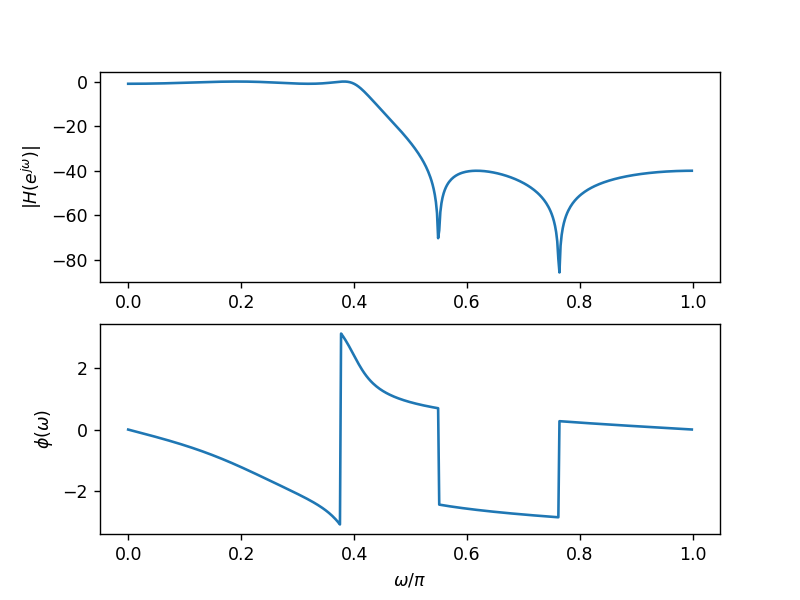

Text(0,0.5,'$\\phi (\\omega)$')

In [10]:
bell, aell = signal.ellip(n, Rp, Rs, wn)
w, Hell = signal.freqz(bell, aell)

plt.figure()
plt.subplot(211)
plt.plot(w/np.pi, 20*np.log10(np.abs(Hell)))
plt.ylabel(r'$\vert H(e^{j \omega}) \vert$')
plt.subplot(212)
plt.plot(w/np.pi, np.angle(Hell))
plt.xlabel(r'$\omega/\pi$')
plt.ylabel(r'$\phi (\omega)$')

In [11]:
deltap = 1 - 10**(-Rp/20)
deltas = 10**(-Rs/20)
N = (-20*np.log10(np.sqrt(deltap*deltas)) - 13)/(14.6*(ws-wp)/2)
N

11.39434575916646

<IPython.core.display.Javascript object>


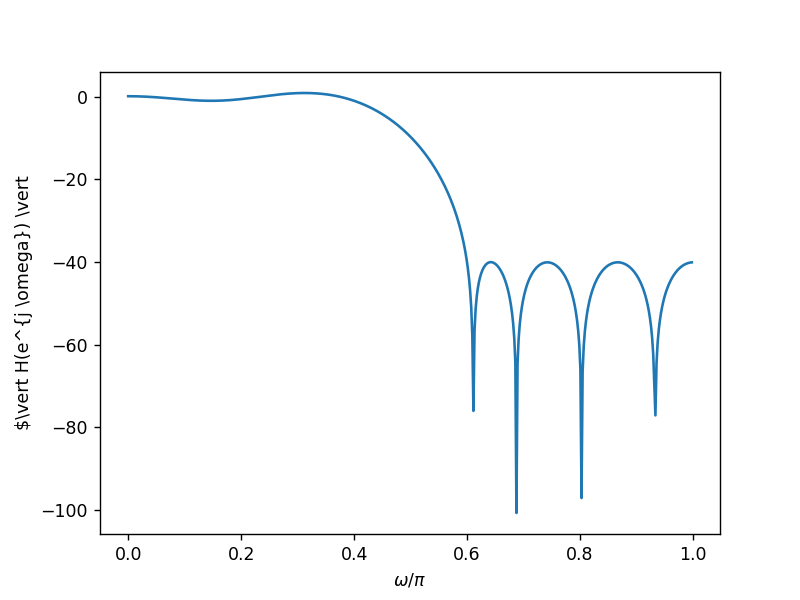

Text(0,0.5,'$\\vert H(e^{j \\omega}) \\vert')

In [19]:
h = signal.remez(13, [0, wp, ws, 1], [1, 0], [1/deltap, 1/deltas], fs=2.0)

w, H = signal.freqz(h, 1)

plt.figure()
plt.plot(w/np.pi, 20*np.log10(np.abs(H)))
plt.xlabel(r'$\omega/\pi$')
plt.ylabel(r'$\vert H(e^{j \omega}) \vert')